# **Подготовка данных**

In [8]:
# Импорт библиотек
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [134]:
result_df = pd.read_csv('user_activity.csv', index_col=0)

df = result_df[['catalogue', 'delivery', 'about', 'marketing', 'addresses']]
print(result_df)

     catalogue   delivery      about  marketing  addresses  group
0    26.858044  25.569688  28.710916  37.004864  24.727313      1
1    41.276713  37.265499  19.756471  17.644522  25.169801      2
2    30.289292  30.319616  24.926083  30.961534  18.483590      0
3    25.670967  27.472409  21.338549  25.928976  12.989278      0
4    33.003950  30.312936  14.492622  20.304446  26.668104      2
..         ...        ...        ...        ...        ...    ...
995  25.851357  31.999246  23.741182  30.774849  16.123658      0
996  36.222361  36.409199  11.007989  24.760598  23.470810      2
997  31.276809  29.913173  25.338438  32.115436  20.623304      0
998  22.567195  38.406295  22.321792  22.683150  16.821428      0
999  27.664613  19.100699  31.000098  30.135271  27.355787      1

[1000 rows x 6 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3158fe1250>,
      dtype=object)

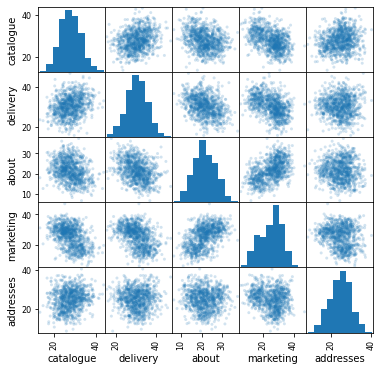

In [120]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6))

# **Алгоритм К-средних**

In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df)

In [122]:
result_df["predicted"] = kmeans.labels_
print(result_df["group"].value_counts())
print(result_df["predicted"].value_counts())
result_df.head()

0    334
1    333
2    333
Name: group, dtype: int64
1    347
0    339
2    314
Name: predicted, dtype: int64


catalogue   delivery      about  marketing  addresses  group  predicted
0  26.858044  25.569688  28.710916  37.004864  24.727313      1          0
1  41.276713  37.265499  19.756471  17.644522  25.169801      2          1
2  30.289292  30.319616  24.926083  30.961534  18.483590      0          2
3  25.670967  27.472409  21.338549  25.928976  12.989278      0          2
4  33.003950  30.312936  14.492622  20.304446  26.668104      2          1

In [123]:
temp = result_df["predicted"].map({2:0,0:1,1:2}) - result_df["group"]
temp.value_counts(normalize=True)

 0    0.888
 1    0.051
-1    0.041
 2    0.016
-2    0.004
dtype: float64

# **Алгоритм уменьшения размерности t-sne**

In [124]:
from sklearn.manifold import TSNE

tsne_data = (df - df.mean())/df.std()
tsne_df = TSNE(n_components=2, perplexity=20).fit_transform(tsne_data)
result_df["tsneX"] = tsne_df[:,0]
result_df["tsneY"] = tsne_df[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


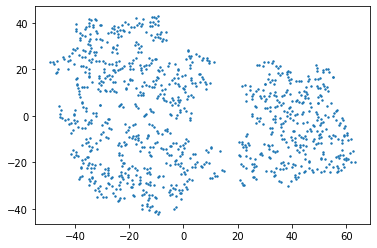

In [125]:
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,) 
plt.savefig("blobs_gray.jpg",dpi=1200,transparent=True)

In [127]:
result_df[(result_df['tsneX']>15) & (result_df['tsneY']<5)]["group"].value_counts()

2    227
0     15
1      1
Name: group, dtype: int64

In [128]:
def colorer(row,column):
    if row[column] == 1:
        return "Green"
    if row[column] == 2:
        return "Brown"    
    return "Magenta"

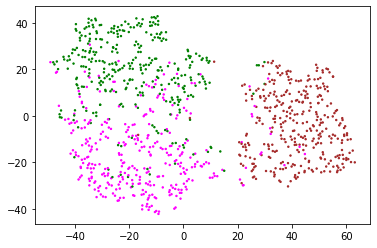

In [129]:
result_df["color"] = result_df.apply(colorer,axis = 1,column = "group")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,c=list(result_df['color'])) 
plt.savefig("blobs_colored.jpg",dpi=1200,transparent=True)

# **Метод главных компонент (PCA)**

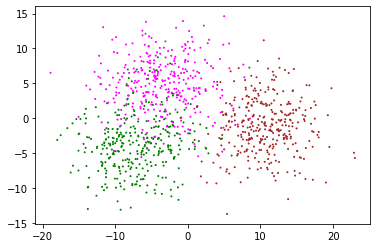

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
result_df['pcaX']  = principalComponents[:,0]
result_df['pcaY']  = principalComponents[:,1]
plt.scatter(result_df['pcaX'] , result_df['pcaY'],s = 1, c=list(result_df['color']),marker = "o",)
plt.show()